<div align="center" style="font-size: 48px; font-weight: bold;"> Fetal Health Prediction </div>


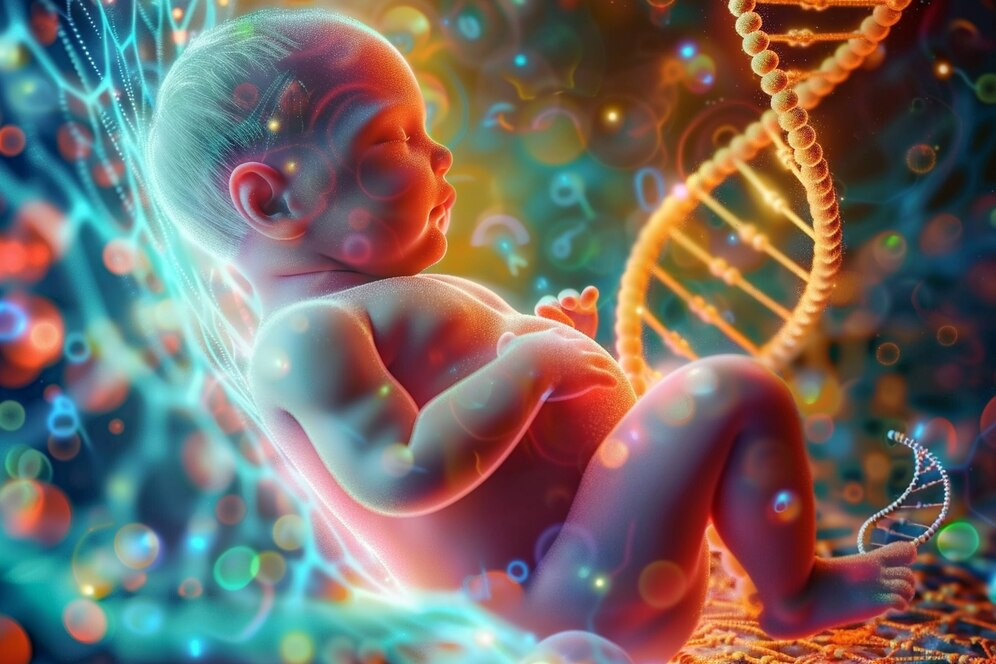

#### Group Number: 77

Student 1: Name: Bulegodaarachchi D. C. <br>
Registration Number: EG/2021/4449 <br><br>
Student 2: Name: Bandara R. M. U. T. <br>
Registration Number: EG/2021/4437


## Introduction
This is a multi class classification problem.The ultimate goal of fetal health prediction is to develop a machine learning model that 
can accurately classify the health status of a fetus based on various clinical features. 
The dataset consists of 21 features and a target variable with three classes: 1-Normal, 
2-Suspect, and 3-Pathological. By analyzing clinical features derived from the dataset, the project aims to leverage preprocessing, feature engineering, and hyperparameter tuning to improve model performance. Advanced techniques, such as cross-validation and imbalance handling, will ensure robust and reliable predictions. The resulting model will serve as a tool for healthcare professionals to make timely and informed decisions, reducing child and maternal mortality rates.



Data Link: https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification

 Algorithms:
1. **RandomForest Classifier**
2. **K-Nearest Neighbor**


## Literture Review 

Machine learning is transforming fetal health monitoring by analyzing cardiotocography data. The Fetal Health Classification Dataset contains 2,126 instances categorized as normal, suspicious, or pathological, with significant challenges due to class imbalance. Researchers have employed various machine learning techniques, including Support Vector Machines, Random Forests, and deep learning neural networks, to improve health classification accuracy. Despite advanced feature selection strategies, most models struggle to achieve high precision. Current research focuses on addressing data imbalance, improving feature selection, and developing specialized algorithms. The ultimate goal is to enhance prenatal care by providing more accurate and reliable health assessments for both mothers and fetuses.

## Description of the Dataset 
The dataset used in this project contains 21 features and a target variable, which classifies fetal health into three categories: Normal (1), Suspect (2), and Pathological (3). These features represent various clinical parameters critical for fetal health assessment. Below are the features included in the dataset:
1. **Baseline value**: Baseline fetal heart rate (FHR).
2. **Accelerations**: Number of accelerations per second.
3. **Fetal movement**: Number of fetal movements.
4. **Uterine contractions**: Number of uterine contractions.
5. **Light decelerations**: Number of light decelerations.
6. **Severe decelerations**: Number of severe decelerations.
7. **Prolonged decelerations**: Number of prolonged decelerations.
8. **Abnormal short-term variability**: Percentage of abnormal short-term variability in FHR.
9. **Mean short-term variability**: Average short-term variability in FHR.
10. **Abnormal long-term variability**: Percentage of abnormal long-term variability in FHR.
11. **Mean long-term variability**: Average long-term variability in FHR.
12. **Histogram width**: Width of the histogram representing FHR.
13. **Histogram minimum**: Minimum value of the histogram for FHR.
14. **Histogram maximum**: Maximum value of the histogram for FHR.
15. **Histogram number of peaks**: Number of peaks in the histogram for FHR.
16. **Histogram number of zero crossings**: Number of zero crossings in the histogram for FHR.
17. **Histogram mode**: Mode of the histogram for FHR.
18. **Histogram mean**: Mean value of the histogram for FHR.
19. **Histogram median**: Median value of the histogram for FHR.
20. **Histogram variance**: Variance in the histogram for FHR.
21. **Histogram tendency**: Tendency of the histogram (positive or negative slope).

**Target Variable**:  
- **Fetal Health**:  
  - **1**: Normal  
  - **2**: Suspect  
  - **3**: Pathological  

### Load Necessary Libraries



In [1]:
import pandas as pd  # Used for data manipulation and analysis
import numpy as np  # Used for numerical computations and handling arrays
import matplotlib.pyplot as plt  # Used for creating static visualizations
import seaborn as sns  # Used for creating advanced and styled visualizations
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score  # Used for splitting data, hyperparameter tuning, and cross-validation
from sklearn.preprocessing import StandardScaler, OneHotEncoder  # Used for data scaling and encoding categorical features
from sklearn.ensemble import RandomForestClassifier  # Used for implementing the Random Forest classification model
from sklearn.neighbors import KNeighborsClassifier  # Used for implementing the K-Nearest Neighbors classification model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report  # Used for evaluating model performance
from imblearn.over_sampling import SMOTE  # Used for oversampling to handle class imbalance


### Data Loading

In [2]:
# 'fetal_health.csv' is the dataset file containing information for fetal health prediction
df = pd.read_csv('fetal_health.csv')

# Display the first 5 rows of the dataset to understand its structure and content
df.head()

baseline value  accelerations  fetal_movement  uterine_contractions  \
0           120.0          0.000             0.0                 0.000   
1           132.0          0.006             0.0                 0.006   
2           133.0          0.003             0.0                 0.008   
3           134.0          0.003             0.0                 0.008   
4           132.0          0.007             0.0                 0.008   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                0.000                   0.0                       0.0   
1                0.003                   0.0                       0.0   
2                0.003                   0.0                       0.0   
3                0.003                   0.0                       0.0   
4                0.000                   0.0                       0.0   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                             73.0                                   0.5   
1                             17.0                                   2.1   
2                             16.0                                   2.1   
3                             16.0                                   2.4   
4                             16.0                                   2.4   

   percentage_of_time_with_abnormal_long_term_variability  ...  histogram_min  \
0                                               43.0       ...           62.0   
1                                                0.0       ...           68.0   
2                                                0.0       ...           68.0   
3                                                0.0       ...           53.0   
4                                                0.0       ...           53.0   

   histogram_max  histogram_number_of_peaks  histogram_number_of_zeroes  \
0          126.0                        2.0                         0.0   
1          198.0                        6.0                         1.0   
2          198.0                        5.0                         1.0   
3          170.0                       11.0                         0.0   
4          170.0                        9.0                         0.0   

   histogram_mode  histogram_mean  histogram_median  histogram_variance  \
0           120.0           137.0             121.0                73.0   
1           141.0           136.0             140.0                12.0   
2           141.0           135.0             138.0                13.0   
3           137.0           134.0             137.0                13.0   
4           137.0           136.0             138.0                11.0   

   histogram_tendency  fetal_health  
0                 1.0           2.0  
1                 0.0           1.0  
2                 0.0           1.0  
3                 1.0           1.0  
4                 1.0           1.0  

[5 rows x 22 columns]

In [3]:
print(df.columns) # Print the column names of the dataset

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')


Since there is no sl_no(index identifiying) column in this dataset, therefore, no need to drop such kind of a column. The reason to drop that column is, if it existed, it serves as an identifier rather than a feature that contributes meaningfully to predictions.

### Exploratory Data Analysis(EDA)

In [4]:
# Identify the shape of the DataFrame
shape = df.shape
print(f"The shape of the DataFrame is: {shape}")


The shape of the DataFrame is: (2126, 22)


In [5]:
# Print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

### Comment  
Based on the printed summary, identify the categorical and numerical features of the dataset. Below are the key observations:

1. Number of non-null values in each column.  
2. Data types of each column.  
3. Memory usage of the DataFrame.  

Here,  
we can see that all the columns have non-null values, and every column consists of numerical data.


In [6]:
# Generate descriptive analytics for numerical features
df.describe()


baseline value  accelerations  fetal_movement  uterine_contractions  \
count     2126.000000    2126.000000     2126.000000           2126.000000   
mean       133.303857       0.003178        0.009481              0.004366   
std          9.840844       0.003866        0.046666              0.002946   
min        106.000000       0.000000        0.000000              0.000000   
25%        126.000000       0.000000        0.000000              0.002000   
50%        133.000000       0.002000        0.000000              0.004000   
75%        140.000000       0.006000        0.003000              0.007000   
max        160.000000       0.019000        0.481000              0.015000   

       light_decelerations  severe_decelerations  prolongued_decelerations  \
count          2126.000000           2126.000000               2126.000000   
mean              0.001889              0.000003                  0.000159   
std               0.002960              0.000057                  0.000590   
min               0.000000              0.000000                  0.000000   
25%               0.000000              0.000000                  0.000000   
50%               0.000000              0.000000                  0.000000   
75%               0.003000              0.000000                  0.000000   
max               0.015000              0.001000                  0.005000   

       abnormal_short_term_variability  mean_value_of_short_term_variability  \
count                      2126.000000                           2126.000000   
mean                         46.990122                              1.332785   
std                          17.192814                              0.883241   
min                          12.000000                              0.200000   
25%                          32.000000                              0.700000   
50%                          49.000000                              1.200000   
75%                          61.000000                              1.700000   
max                          87.000000                              7.000000   

       percentage_of_time_with_abnormal_long_term_variability  ...  \
count                                         2126.00000       ...   
mean                                             9.84666       ...   
std                                             18.39688       ...   
min                                              0.00000       ...   
25%                                              0.00000       ...   
50%                                              0.00000       ...   
75%                                             11.00000       ...   
max                                             91.00000       ...   

       histogram_min  histogram_max  histogram_number_of_peaks  \
count    2126.000000    2126.000000                2126.000000   
mean       93.579492     164.025400                   4.068203   
std        29.560212      17.944183                   2.949386   
min        50.000000     122.000000                   0.000000   
25%        67.000000     152.000000                   2.000000   
50%        93.000000     162.000000                   3.000000   
75%       120.000000     174.000000                   6.000000   
max       159.000000     238.000000                  18.000000   

       histogram_number_of_zeroes  histogram_mode  histogram_mean  \
count                 2126.000000     2126.000000     2126.000000   
mean                     0.323612      137.452023      134.610536   
std                      0.706059       16.381289       15.593596   
min                      0.000000       60.000000       73.000000   
25%                      0.000000      129.000000      125.000000   
50%                      0.000000      139.000000      136.000000   
75%                      0.000000      148.000000      145.000000   
max                     10.000000      187.000000      182.000000   

       histogram_median  histogr

df.describe() generates summary statistics for numerical features in the DataFrame, including:
- **Count**: Number of non-null values.
- **Mean**: Average value.
- **Standard deviation (std)**: Spread of the data.
- **Min**: Minimum value.
- **25th, 50th (median), 75th percentiles**: Quartile values.
- **Max**: Maximum value.

This is useful for understanding the distribution and variability of numerical features in the dataset.


### Data Visualization 

in normal scenario we don't see the test data set, there fore we only visualize the training data set here.

In [7]:
# Separate independent variables (X) and the dependent variable (y)
X = df.drop(columns=['fetal_health'])  # Drop the target column to get features
y = df['fetal_health']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Confirm the split
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")


Training set size: 1700 samples
Test set size: 426 samples


fetal_health
1.0    1655
2.0     295
3.0     176
Name: count, dtype: int64


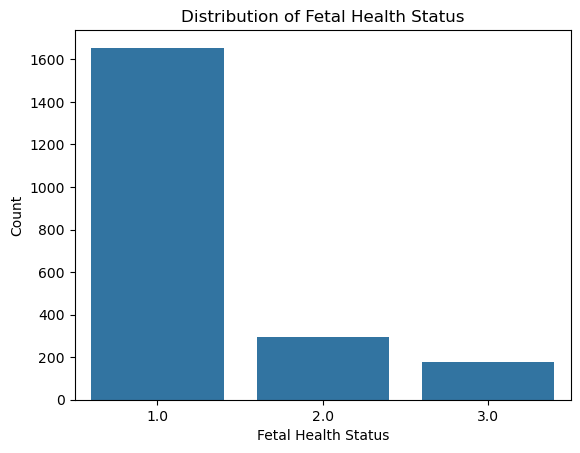

In [8]:
# Import seaborn if not already imported
import seaborn as sns
import matplotlib.pyplot as plt

# Create a count plot for the target variable
sns.countplot(x='fetal_health', data=df)

# Checking class distribution
print(df['fetal_health'].value_counts())

# Set title and labels
plt.title('Distribution of Fetal Health Status')
plt.xlabel('Fetal Health Status')
plt.ylabel('Count')

# Show the plot
plt.show()



### Reasons for Data Imbalance

1. **Bias Toward the Majority Class**:  
   Models may focus heavily on the majority class and perform poorly in predicting minority class instances, leading to high accuracy but poor recall for minority classes.

2. **Misleading Performance Metrics**:  
   Metrics like accuracy can be misleading in imbalanced datasets because a model can achieve high accuracy by predicting only the majority class while ignoring minority classes.

3. **Overfitting to the Majority Class**:  
   The model may overfit to the majority class patterns, making it less generalizable to unseen data and worsening its ability to predict the minority class.


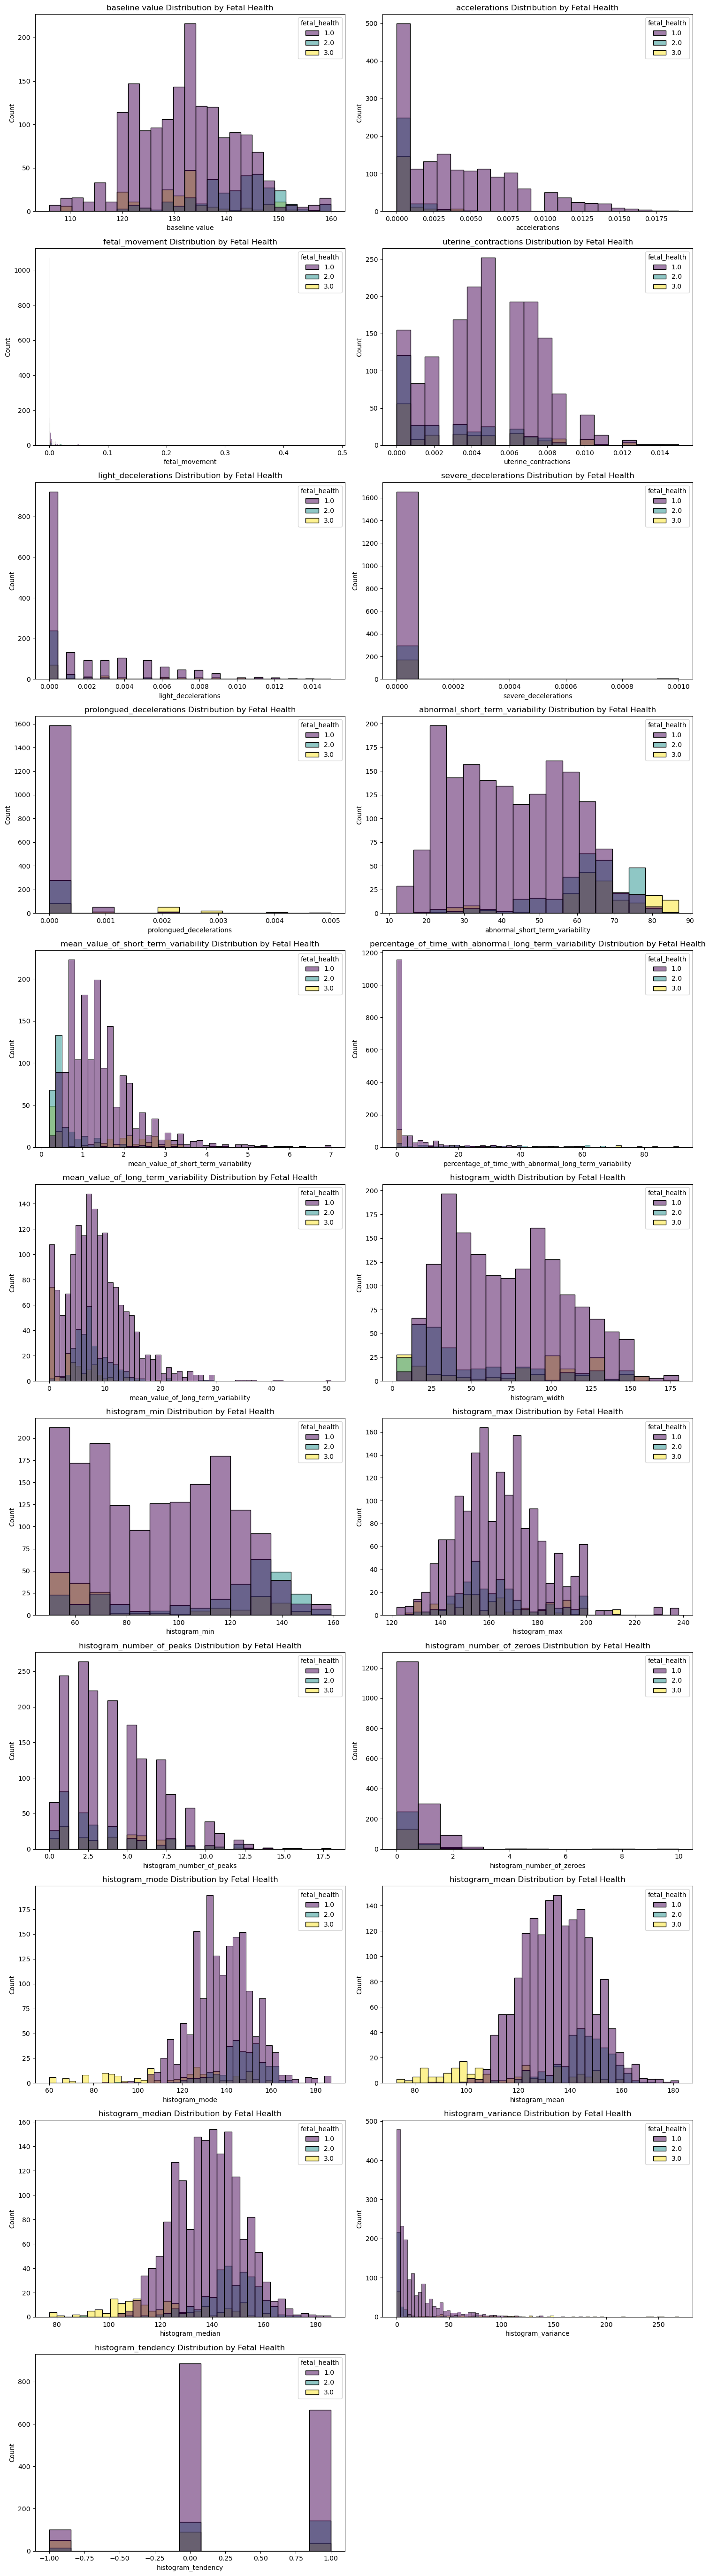

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of all the feature columns except 'fetal_health' (target variable)
features = ['baseline value', 'accelerations', 'fetal_movement', 'uterine_contractions',
            'light_decelerations', 'severe_decelerations', 'prolongued_decelerations',
            'abnormal_short_term_variability', 'mean_value_of_short_term_variability',
            'percentage_of_time_with_abnormal_long_term_variability',
            'mean_value_of_long_term_variability', 'histogram_width', 'histogram_min',
            'histogram_max', 'histogram_number_of_peaks', 'histogram_number_of_zeroes',
            'histogram_mode', 'histogram_mean', 'histogram_median', 'histogram_variance',
            'histogram_tendency']

# Determine the number of rows for subplots
n_rows = (len(features) + 1) // 2

# Set up the figure
fig, axes = plt.subplots(n_rows, 2, figsize=(15, n_rows * 5))
axes = axes.flatten()  # Flatten the axes for easy indexing

# Loop through all features and plot
for i, feature in enumerate(features):
    sns.histplot(x=feature, hue='fetal_health', data=df, kde=False, ax=axes[i], palette='viridis')
    axes[i].set_title(f'{feature} Distribution by Fetal Health')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


### Summary of Histograms

#### Feature Distributions by Fetal Health:

- Each histogram visualizes the distribution of a given feature, broken down by the fetal_health target classes (represented by different colors).
- The fetal_health classes are **1, 2, and 3**, indicating distinct health states for the fetus.

#### Key Observations Across Various Features:

- **Baseline Value**: Shows a significant central peak around 130, with some variations across the fetal_health classes.
- **Accelerations and Fetal Movement**: Display distinct differences in their distributions, with clear class-specific variations.
- **Uterine Contractions and Light Decelerations**: Have concentrated distributions with notable peaks indicating higher counts for certain values.
- **Histogram Number of Peaks and Histogram Tendency**: Show specific trends that differentiate between fetal health states with distinct variations.
- **Percentage of Time with Abnormal Long-Term Variability**: Reveals some differences across classes, suggesting important health indicators.

#### Visual Comparisons:

- Each histogram includes the fetal_health classes represented in different hues, making it visually easy to observe class differences.
- The histograms show class distinctions in terms of **peak concentrations**, **variability**, and **counts**, which could help in identifying indicators of fetal health conditions.


In [10]:
# Check for the null values in train set
X_train.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [11]:
# Check for the null values in test set
X_test.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

#### Summary
It can clearly identify that both training and test dataset free from null values.

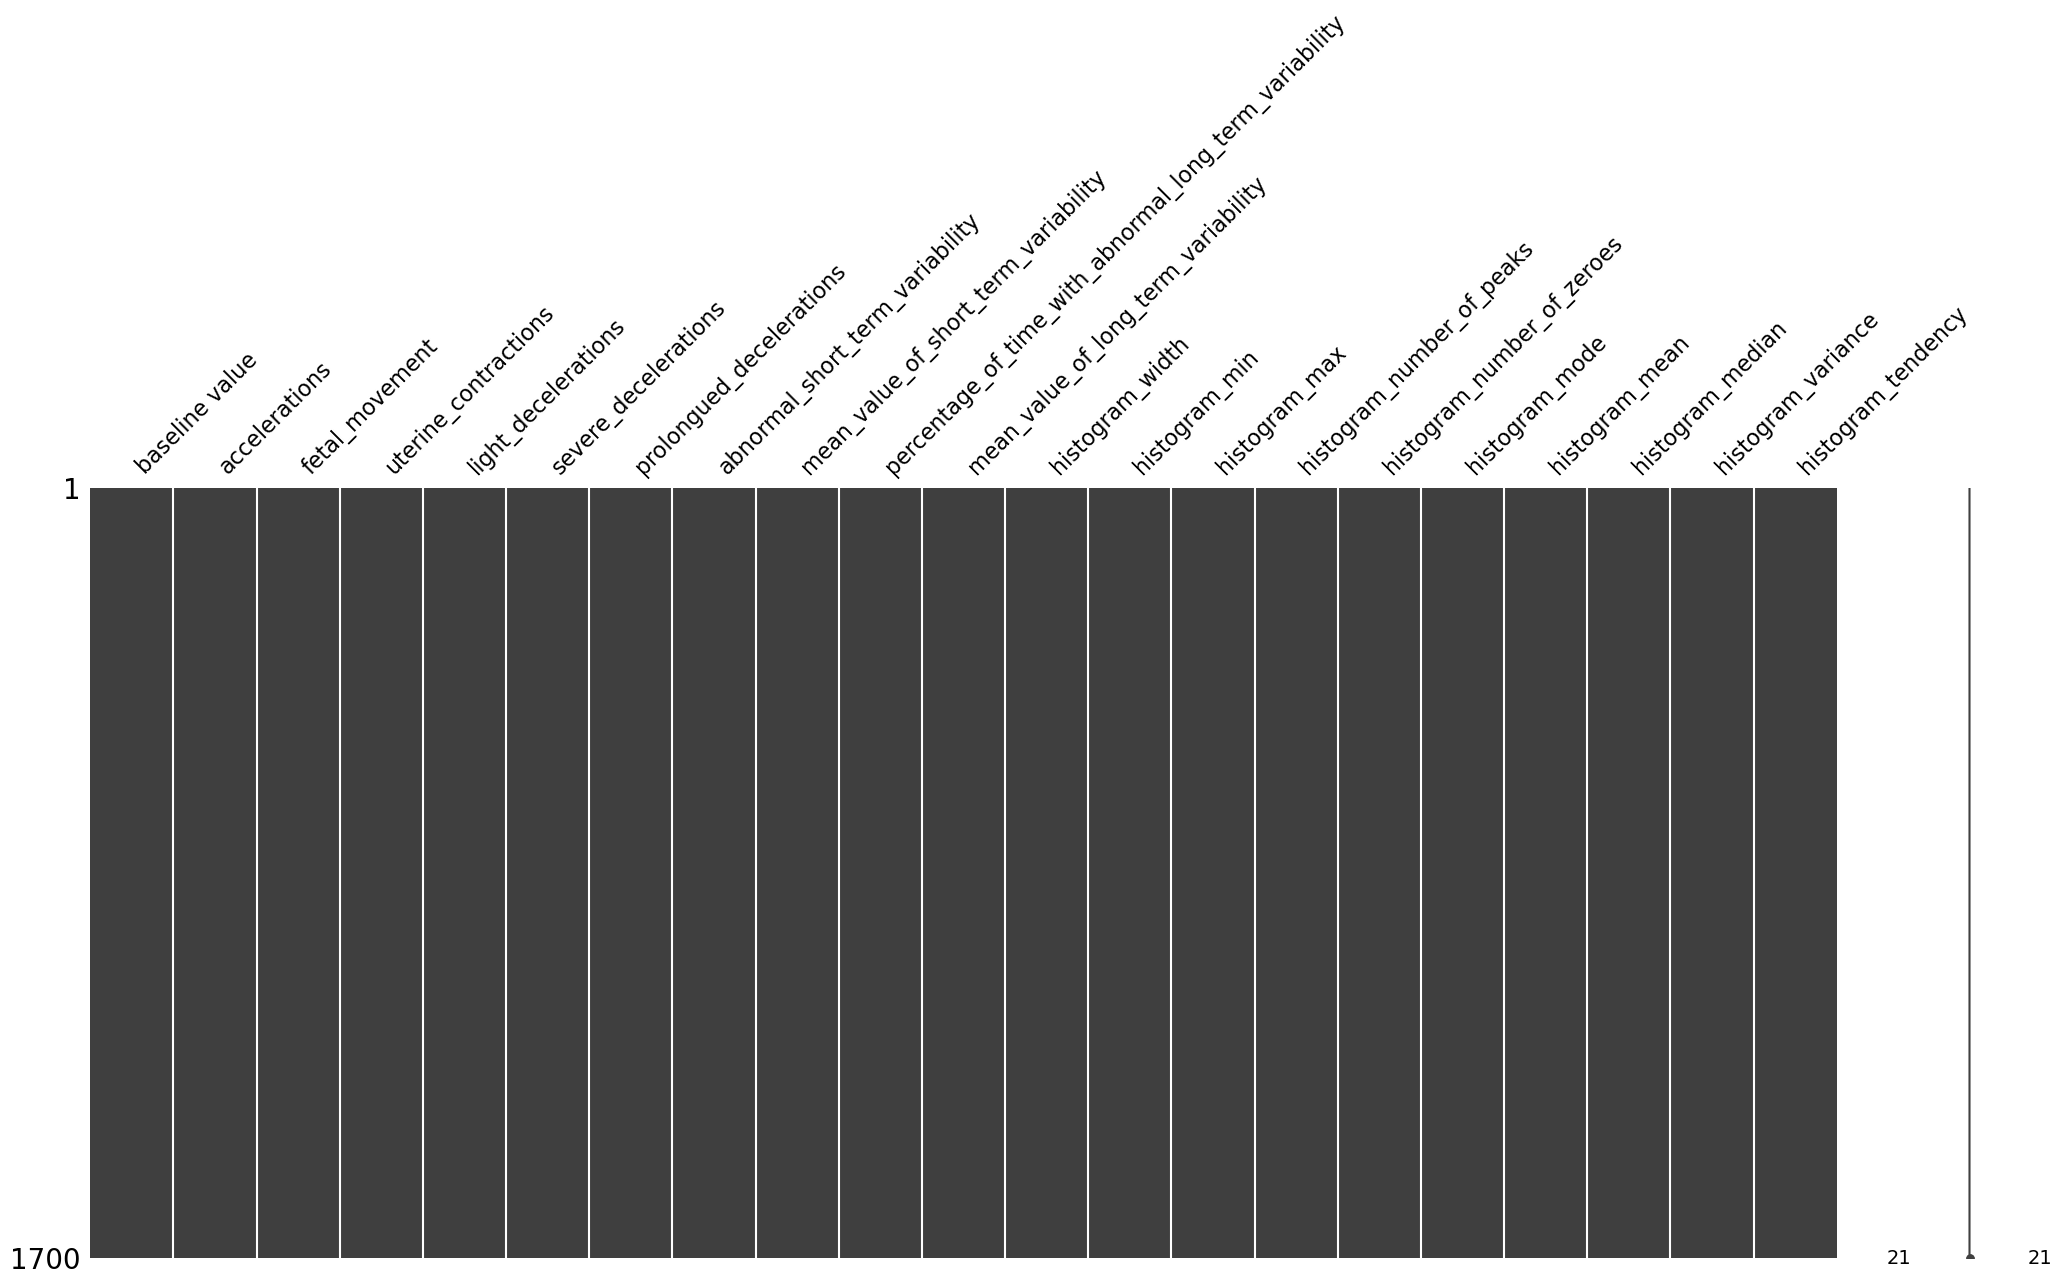

In [12]:
import missingno as msno
import matplotlib.pyplot as plt

# Visualizing missing values in the training set
msno.matrix(X_train)
plt.show()


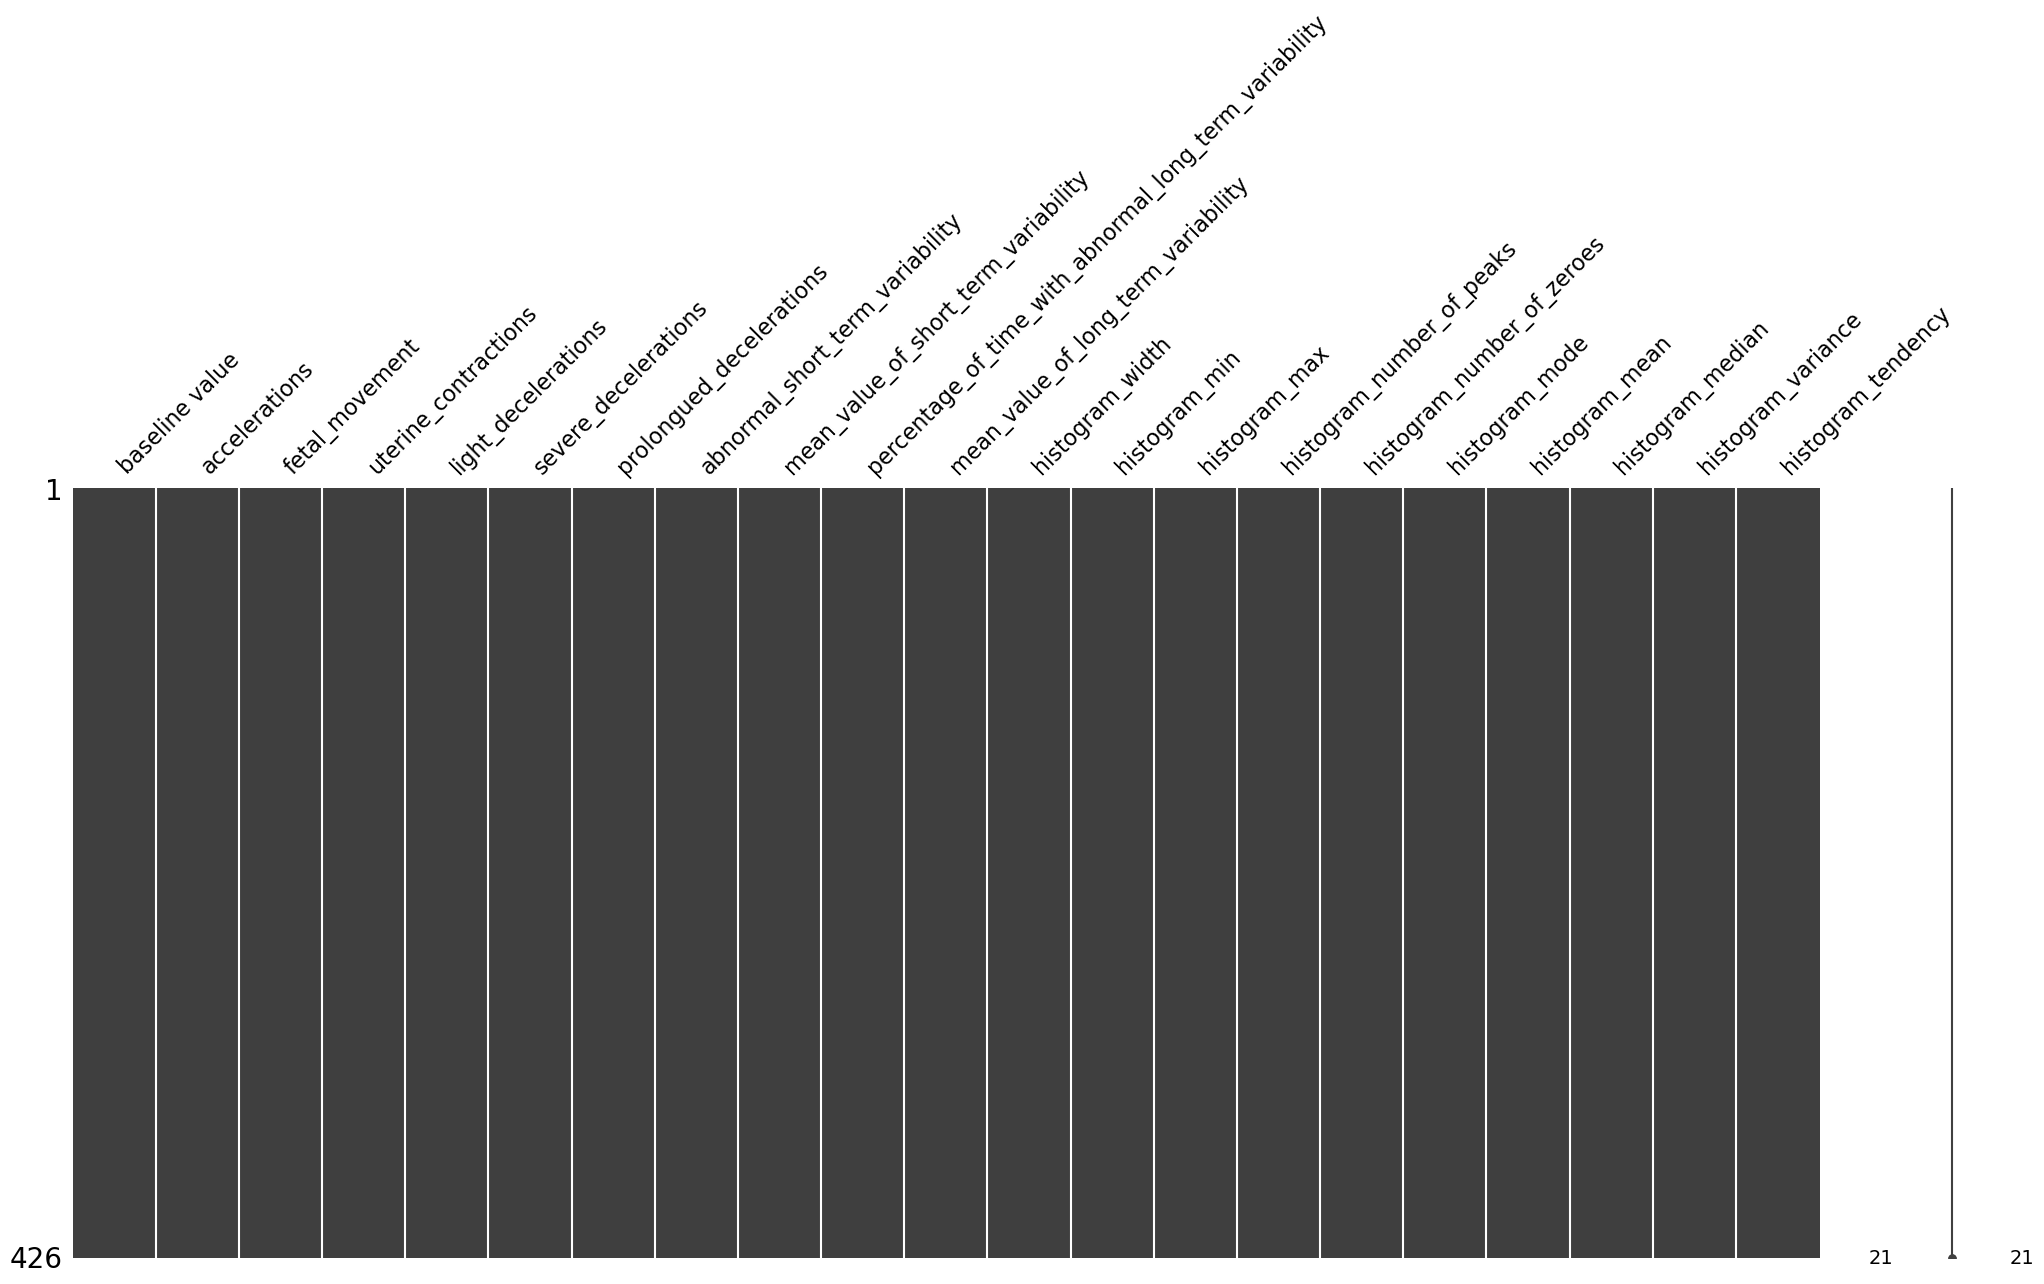

In [13]:
import missingno as msno
import matplotlib.pyplot as plt

# Visualizing missing values in the test set
msno.matrix(X_test)
plt.show()


## Data Preprocessing

### Handle the Missing Data

In [14]:
# Check for null values in the training set
null_values_train = X_train.isnull().sum()
print("Null values in Training Set:")
print(null_values_train[null_values_train > 0])  # Show only columns with null values
print(f"Total columns with null values in Training Set: {null_values_train[null_values_train > 0].count()}")

# Check for null values in the test set
null_values_test = X_test.isnull().sum()
print("\nNull values in Test Set:")
print(null_values_test[null_values_test > 0])  # Show only columns with null values
print(f"Total columns with null values in Test Set: {null_values_test[null_values_test > 0].count()}")


Null values in Training Set:
Series([], dtype: int64)
Total columns with null values in Training Set: 0

Null values in Test Set:
Series([], dtype: int64)
Total columns with null values in Test Set: 0


#### Summary 
In here it clearly shows that no any null values in both training and testing datasets, Therefore, no need to use null value handling techniques. 

### Handle duplicate records

In [15]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Check the shape of X_train and y_train before dropping duplicates
print(f"Shape of X_train before dropping duplicates: {X_train.shape}")
print(f"Shape of y_train before dropping duplicates: {y_train.shape}")

# Remove duplicates by combining the feature set and target variable into a single dataframe
# This ensures that we drop rows where both features and target are identical
df_train = X_train.copy()
df_train['target'] = y_train  # Add target to the dataframe

# Drop duplicates
df_train = df_train.drop_duplicates()

# Separate the features (X_train) and target variable (y_train) again after dropping duplicates
X_train_cleaned = df_train.drop(columns=['target'])
y_train_cleaned = df_train['target']

# Check the shape after dropping duplicates
print(f"Shape of X_train after dropping duplicates: {X_train_cleaned.shape}")
print(f"Shape of y_train after dropping duplicates: {y_train_cleaned.shape}")




Shape of X_train before dropping duplicates: (1700, 21)
Shape of y_train before dropping duplicates: (1700,)
Shape of X_train after dropping duplicates: (1694, 21)
Shape of y_train after dropping duplicates: (1694,)


#### Summary
There are 6 duplicate values in the training dataset, So they were removed to get a clear dataset

### Handling the imbalance nature of the training dataset

In [16]:
# Initialize SMOTE for oversampling the minority class
smote = SMOTE(random_state=42)

# Apply SMOTE to the cleaned training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_cleaned, y_train_cleaned)

# Check the class distribution before resampling (original class distribution)
print(f"Original class distribution: {Counter(y_train_cleaned)}")

# Check the class distribution after resampling
print(f"Resampled class distribution: {Counter(y_train_resampled)}")


Original class distribution: Counter({1.0: 1318, 2.0: 229, 3.0: 147})
Resampled class distribution: Counter({1.0: 1318, 2.0: 1318, 3.0: 1318})


#### Summary
Initially, the dataset has an imbalance across the fetal health classes, but after applying SMOTE, the class distribution is balanced, with each class containing the same number of samples (1318 for class 1, 1318 for class 2, and 1318 for class 3). Balancing the classes helps in improving the model's ability to accurately predict outcomes without being biased toward any particular class, which is crucial in maintaining the integrity and reliability of the predictions in real-world applications.

### Handle the categorical features 

In [17]:
# Identify categorical features in X_train
categorical_features_train = X_train_resampled.select_dtypes(include=['object', 'category']).columns.tolist()

# Print the categorical features
print("Categorical Features in training dataset:")
print(categorical_features_train)

# Identify categorical features in X_train
categorical_features_test = X_test.select_dtypes(include=['object', 'category']).columns.tolist()

# Print the categorical features
print("Categorical Features in test dataset:")
print(categorical_features_test)

Categorical Features in training dataset:
[]
Categorical Features in test dataset:
[]


#### Summary
There are no any categorical features in the dataset. Therefore, no need to use any categorical feature handling technique

### Scale the Numerical features

In [18]:
# Scale the features (assuming X_train and X_test are already separated)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_cleaned)
X_test_scaled = scaler.transform(X_test)

# Convert the scaled data back to DataFrame for easy handling
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train_cleaned.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [19]:
# Display the first few rows of the scaled training set to confirm changes
print("Scaled Training Features:")
X_train_scaled_df.head()


Scaled Training Features:


baseline value  accelerations  fetal_movement  uterine_contractions  \
0       -0.819074      -0.825314       -0.204317              1.215656   
1        0.693364      -0.825314       -0.204317             -1.164669   
2       -1.121561      -0.825314       -0.204317             -1.504715   
3        0.390877       0.462292       -0.204317              0.195517   
4        0.895023      -0.052751       -0.204317             -0.144530   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0            -0.638937             -0.064416                 -0.268656   
1            -0.638937             -0.064416                 -0.268656   
2            -0.298893             -0.064416                 -0.268656   
3             0.041151             -0.064416                 -0.268656   
4            -0.638937             -0.064416                 -0.268656   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                        -0.859154                             -0.264200   
1                         0.763631                             -0.605846   
2                        -1.554633                              0.532972   
3                        -0.627327                             -0.491964   
4                        -0.047761                             -0.719727   

   percentage_of_time_with_abnormal_long_term_variability  ...  \
0                                          -0.366066       ...   
1                                           1.237443       ...   
2                                          -0.531946       ...   
3                                          -0.531946       ...   
4                                           0.960976       ...   

   histogram_width  histogram_min  histogram_max  histogram_number_of_peaks  \
0        -0.501236       0.090118      -0.950196                  -0.015459   
1         1.265095      -0.482649       1.972525                   1.685033   
2        -0.808423       0.325963      -1.231227                  -1.035754   
3        -0.194048       0.730269       0.792195                  -0.015459   
4        -1.141210       1.336728      -0.275722                  -1.035754   

   histogram_number_of_zeroes  histogram_mode  histogram_mean  \
0                   -0.446258       -0.679651       -0.602330   
1                   -0.446258        0.222126        0.414712   
2                   -0.446258       -1.040361       -0.983721   
3                   -0.446258        0.642955        0.859668   
4                   -0.446258        0.763192        0.859668   

   histogram_median  histogram_variance  histogram_tendency  
0         -0.742240           -0.581701           -0.514596  
1          0.281609           -0.547195           -0.514596  
2         -1.151780           -0.547195           -0.514596  
3          0.759405           -0.340156           -0.514596  
4          0.827662           -0.616208           -0.514596  

[5 rows x 21 columns]

In [20]:
# Display the first few rows of the scaled test set to confirm changes
print("Scaled Test Features:")
X_test_scaled_df.head()

Scaled Test Features:


baseline value  accelerations  fetal_movement  uterine_contractions  \
0       -0.012440      -0.310272        0.002330             -0.484576   
1       -0.819074      -0.825314       -0.183653              1.555702   
2       -0.214098       0.204770       -0.142323             -0.144530   
3       -0.214098       2.007419       -0.204317              0.195517   
4       -0.819074      -0.825314       -0.204317              1.215656   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0             0.041151             -0.064416                 -0.268656   
1             2.081414             -0.064416                 -0.268656   
2             1.061282             -0.064416                  1.380271   
3            -0.638937             -0.064416                 -0.268656   
4             1.741370             -0.064416                  1.380271   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                        -0.047761                             -0.264200   
1                         0.879544                              0.419090   
2                         0.763631                              0.874617   
3                        -1.033023                             -0.036437   
4                         0.995458                             -0.036437   

   percentage_of_time_with_abnormal_long_term_variability  ...  \
0                                          -0.531946       ...   
1                                          -0.531946       ...   
2                                          -0.531946       ...   
3                                          -0.531946       ...   
4                                          -0.531946       ...   

   histogram_width  histogram_min  histogram_max  histogram_number_of_peaks  \
0        -0.040454       0.056425       0.005309                   0.324639   
1         0.036343      -0.853263      -1.343639                   0.324639   
2         0.497125      -0.516341       0.230133                   1.344935   
3         0.471526      -0.381573       0.398752                   1.344935   
4         0.164338      -0.516341      -0.500547                  -0.015459   

   histogram_number_of_zeroes  histogram_mode  histogram_mean  \
0                   -0.446258        0.101889        0.033321   
1                   -0.446258       -0.439177       -1.174416   
2                   -0.446258       -0.258822       -0.475200   
3                   -0.446258        0.342363        0.668972   
4                   -0.446258       -1.401072       -1.492242   

   histogram_median  histogram_variance  histogram_tendency  
0          0.008582           -0.340156           -0.514596  
1         -0.878753            0.349974            1.120913  
2         -0.400957            0.073922           -0.514596  
3          0.486379           -0.340156            1.120913  
4         -1.629576           -0.409169           -0.514596  

[5 rows x 21 columns]

From the EDA you should have observed that dataset is imbalanced. Therefore, in the following section we are going to handle the imbalance nature of the dataset using the technique calle SMOTE (Synthetic Minority Over-sampling Technique). SMOTE has been included with the imbalanced-learn library.

### Treating Outliers 

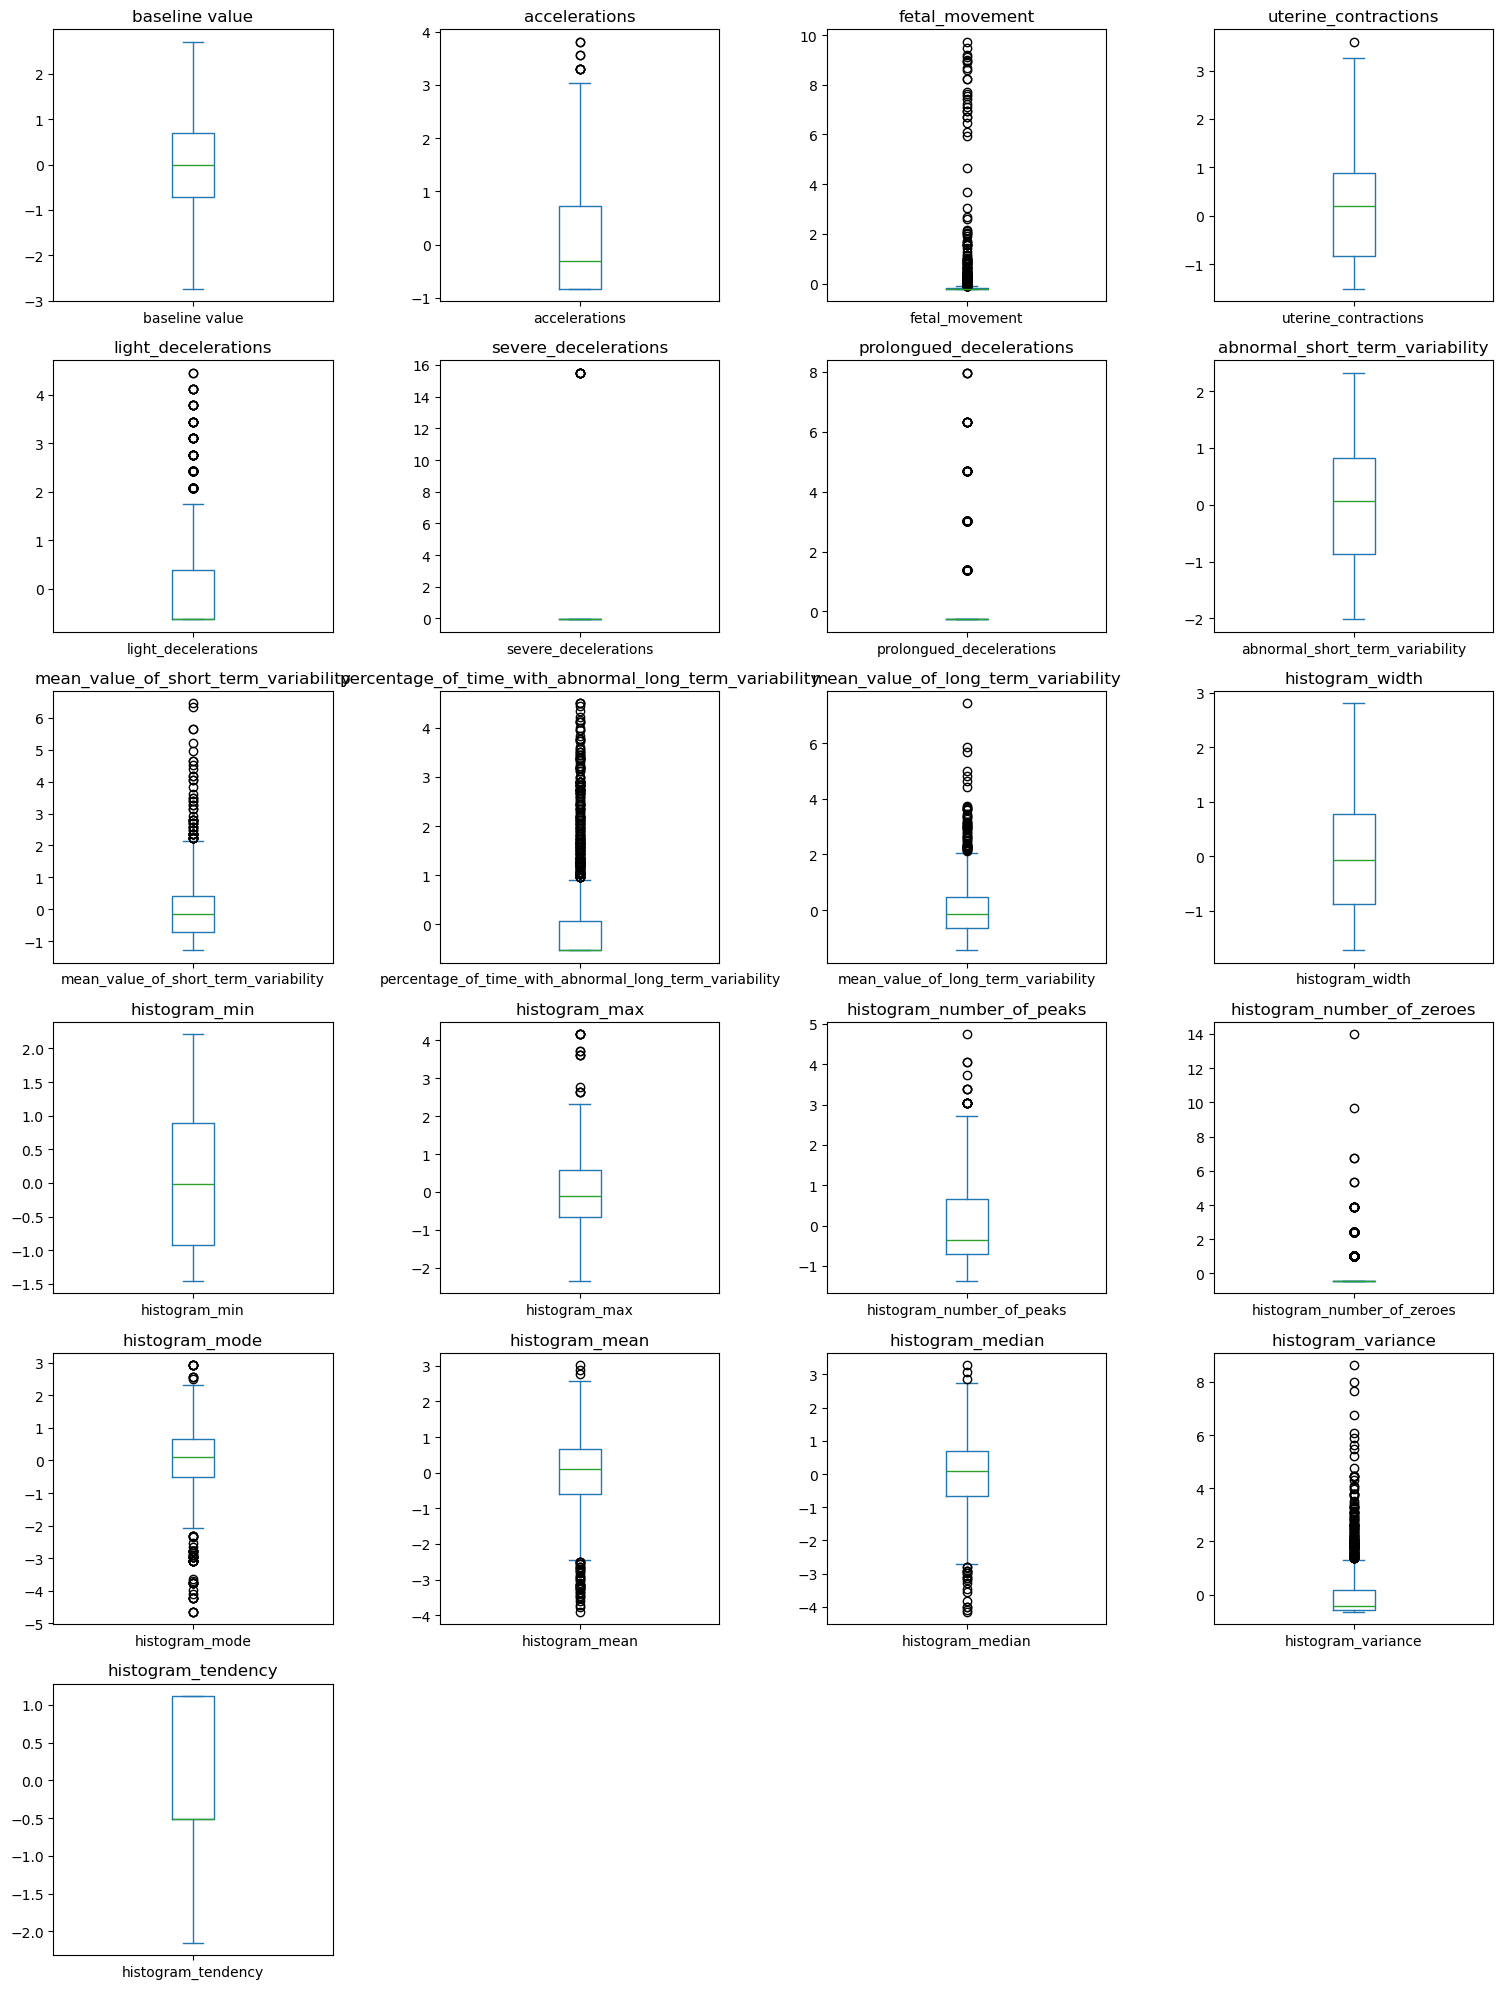

In [21]:
import matplotlib.pyplot as plt

# Create a figure and axes object with 6 rows and 4 columns
fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(15, 20))

# Flatten axes array for easier iteration
axes = axes.flatten()

# Plot each column in X_train as a separate boxplot
for i, column in enumerate(X_train_scaled_df.columns):
    X_train_scaled_df[column].plot(kind='box', ax=axes[i], title=column)

# Hide any empty axes (if there are more subplots than features)
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


In [22]:
import pandas as pd

# Function to calculate outliers using IQR
def detect_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
    return outliers

# Detect outliers before handling (capping)
outliers_before = detect_outliers(X_train_scaled_df)
print(f"Outliers in each column before handling:\n{outliers_before}\n")

# Define percentiles for capping
lower_percentile = 3
upper_percentile = 97

# Calculate the lower and upper bounds for each feature using percentiles
lower_bounds = X_train_scaled_df.quantile(lower_percentile / 100)
upper_bounds = X_train_scaled_df.quantile(upper_percentile / 100)

# Cap the outliers in the training dataset
X_train_scaled_capped = X_train_scaled_df.copy()

# Apply capping to each feature
for column in X_train_scaled_df.columns:
    X_train_scaled_capped[column] = X_train_scaled_capped[column].clip(lower=lower_bounds[column], upper=upper_bounds[column])

# Detect outliers after handling (capping)
outliers_after = detect_outliers(X_train_scaled_capped)
print(f"Outliers in each column after handling (capping):\n{outliers_after}")


Outliers in each column before handling:
baseline value                                              0
accelerations                                               9
fetal_movement                                            290
uterine_contractions                                        1
light_decelerations                                       119
severe_decelerations                                        7
prolongued_decelerations                                  142
abnormal_short_term_variability                             0
mean_value_of_short_term_variability                       52
percentage_of_time_with_abnormal_long_term_variability    244
mean_value_of_long_term_variability                        57
histogram_width                                             0
histogram_min                                               0
histogram_max                                              14
histogram_number_of_peaks                                  16
histogram_number_of_zeroes   

#### Summary
Before treating outliers, the dataset exhibited extreme values in several columns, which likely represented anomalies that could skew analysis. For example, variables like "light_decelerations" and "prolonged_decelerations" had unusually high maximum values, indicating potential outliers. After applying outlier treatment, specifically capping, these extreme values were adjusted to fall within a more reasonable range. For instance, "light_decelerations" was capped at 119 and "prolonged_decelerations" at 142, ensuring the dataset became more consistent. However, it is important to note that not all high deviations were classified as outliers. Variables such as "histogram_number_of_peaks," with a capped value of 384, were left unchanged because these naturally high values were intrinsic to the data's distribution and not considered anomalies. This balanced approach maintained the integrity of the dataset while reducing the influence of extreme outliers.


### Feature Selection

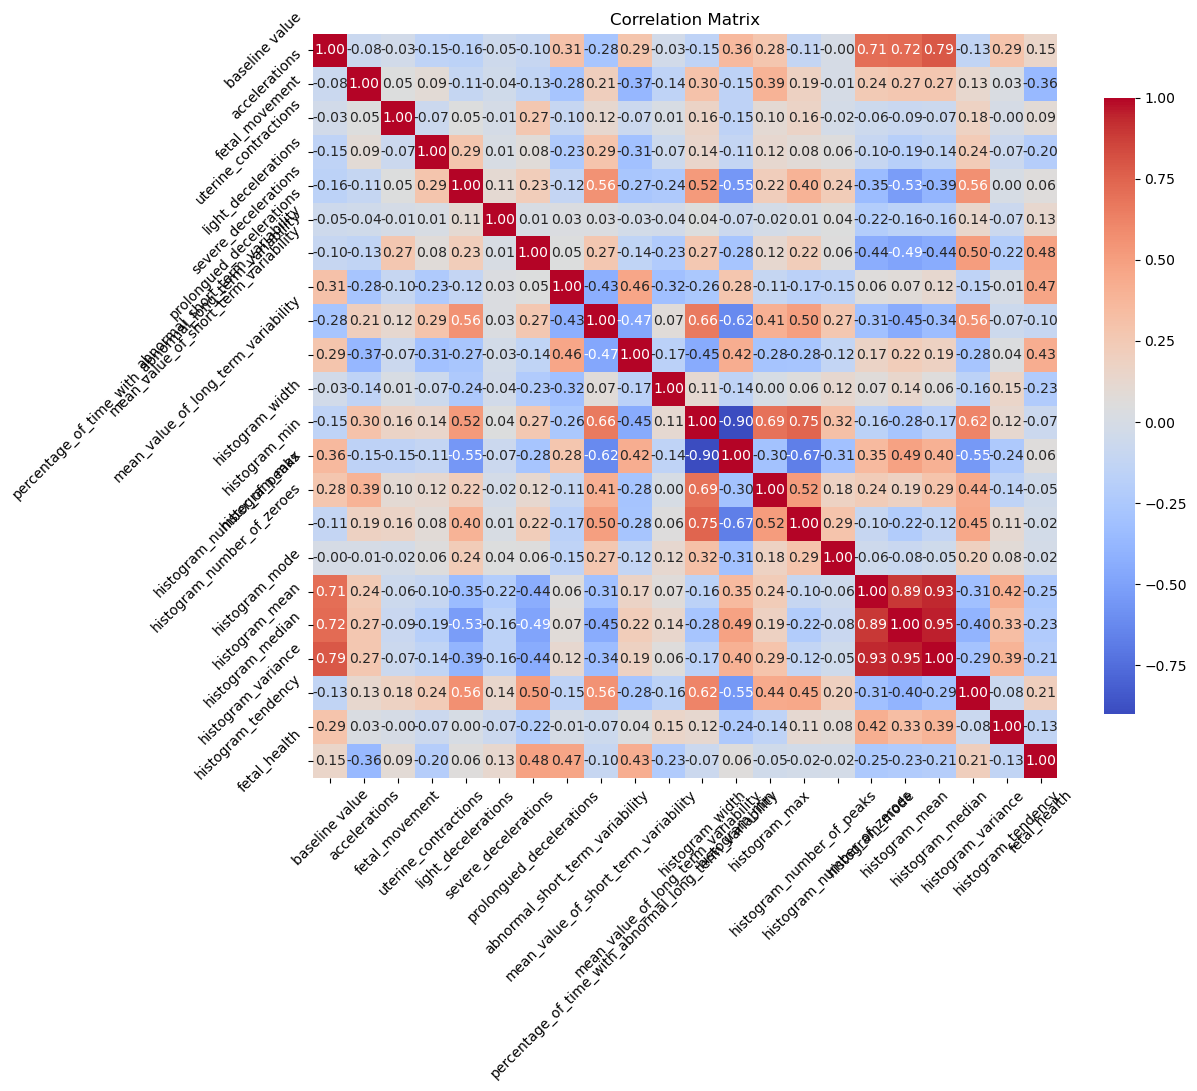

In [23]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Set titles and labels
plt.title('Correlation Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=45)

# Show the plot
plt.show()

In [24]:
# Define a threshold for high correlation
correlation_threshold = 0.7  # You can adjust this threshold as needed



# Identify pairs of features with correlation higher than the threshold
to_drop = set()  # Use a set to avoid duplicates

# Iterate through the correlation matrix
for col in correlation_matrix.columns:
    for row in correlation_matrix.index:
        # Skip the diagonal (correlation of a feature with itself)
        if col != row and abs(correlation_matrix.loc[row, col]) > correlation_threshold:
            # Mark the feature to drop
            to_drop.add(col)

# Remove the features with high correlation
X_train_scaled_df = X_train_scaled_df.drop(columns=to_drop)
X_test_scaled_df = X_test_scaled_df.drop(columns=to_drop)

# Print the features to drop and remaining selected features
print("Features dropped due to high correlation:")
print(to_drop)
print()  # New line added for readability

# Print the remaining features and their count
remaining_features = X_train_scaled_df.columns.tolist()
print("Remaining Features after removing highly correlated ones:")
print(remaining_features)
print(f"Number of remaining features: {len(remaining_features)}")


Features dropped due to high correlation:
{'baseline value', 'histogram_number_of_peaks', 'histogram_mean', 'histogram_width', 'histogram_min', 'histogram_median', 'histogram_mode'}

Remaining Features after removing highly correlated ones:
['accelerations', 'fetal_movement', 'uterine_contractions', 'light_decelerations', 'severe_decelerations', 'prolongued_decelerations', 'abnormal_short_term_variability', 'mean_value_of_short_term_variability', 'percentage_of_time_with_abnormal_long_term_variability', 'mean_value_of_long_term_variability', 'histogram_max', 'histogram_number_of_zeroes', 'histogram_variance', 'histogram_tendency']
Number of remaining features: 14


#### Summary
A correlation threshold of 0.7 is set to identify and remove highly correlated features from the dataset. The correlation matrix is iterated through to find pairs of features with correlation values above the threshold, and these features are marked for removal to prevent multicollinearity. As a result, several features, such as 'histogram_width,' 'baseline value,' and 'histogram_mean,' were dropped due to high correlations. After removal, 14 remaining features were retained, ensuring a better dataset for model training without unnecessary redundancy. This step helps improve the efficiency and interpretability of the machine learning model by reducing the risk of multicollinearity issues.

## Model evaluations 

### Random forest Algorithm

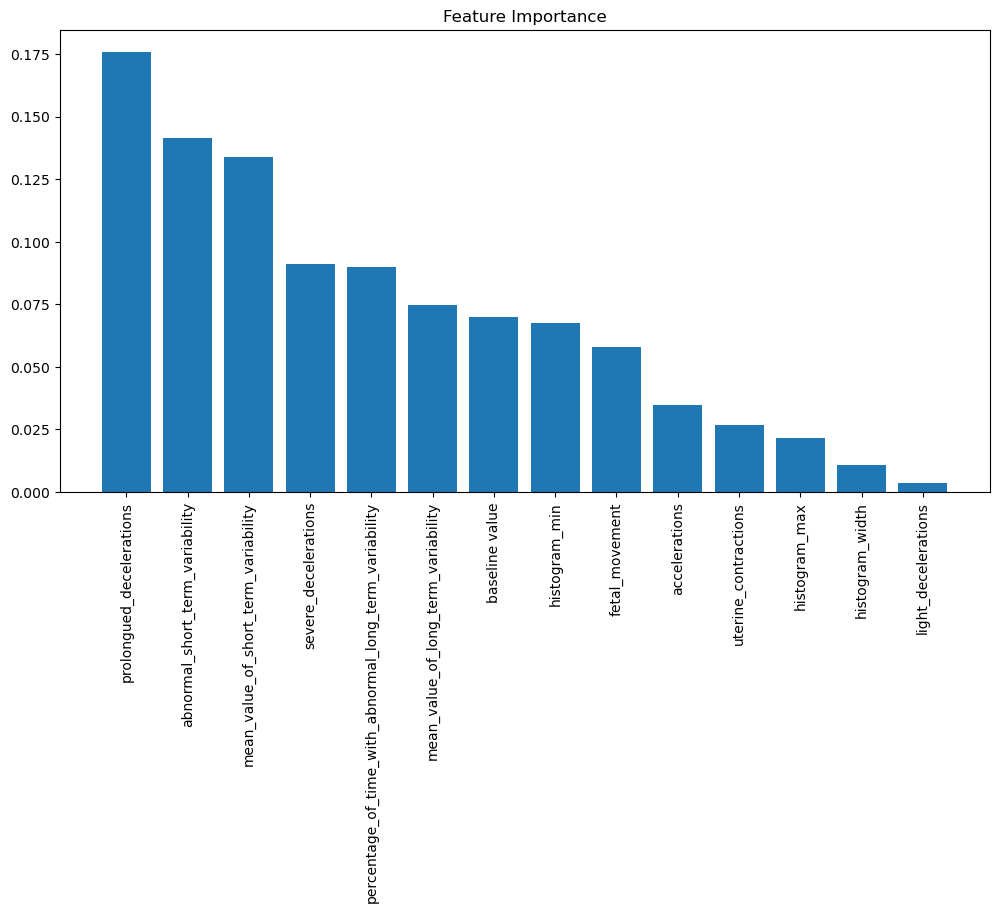

In [25]:
# Train Random Forest to get feature importance
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled_df, y_train_cleaned)

# Plot feature importance
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
features = df.columns[:-1]  # Exclude target variable

plt.figure(figsize=(12, 6))
plt.bar(range(X_train_scaled_df.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train_scaled_df.shape[1]), features[indices], rotation=90)
plt.title('Feature Importance')
plt.show()

#### Summary 
A correlation threshold of 0.7 is set to identify and remove highly correlated features from the dataset. The correlation matrix is iterated through to find pairs of features with correlation values above the threshold, and these features are marked for removal to prevent multicollinearity. As a result, several features, such as 'histogram_width,' 'baseline value,' and 'histogram_mean,' were dropped due to high correlations. After removal, 14 remaining features were retained, ensuring a better dataset for model training without unnecessary redundancy. This step helps improve the efficiency and interpretability of the machine learning model by reducing the risk of multicollinearity issues.

In [26]:
# Assuming X_test_scaled_df and y_test_cleaned exist as your test set
y_test_pred_rf = rf.predict(X_test_scaled_df)

# Evaluation metrics on the test set
print(f'Random Forest Accuracy on Test Set: {accuracy_score(y_test, y_test_pred_rf):.2f}')
print(f'Precision on Test Set: {precision_score(y_test, y_test_pred_rf, average="weighted"):.2f}')
print(f'Recall on Test Set: {recall_score(y_test, y_test_pred_rf, average="weighted"):.2f}')
print(f'F1 Score on Test Set: {f1_score(y_test, y_test_pred_rf, average="weighted"):.2f}')

Random Forest Accuracy on Test Set: 0.95
Precision on Test Set: 0.95
Recall on Test Set: 0.95
F1 Score on Test Set: 0.95


#### Summary
#### Model Evaluation - Random Forest Classifier

This code evaluates the performance of a **Random Forest classifier** on the test dataset. The model is used to make predictions on X_test_scaled_df, and the following metrics are calculated:

- **Accuracy:** The overall accuracy is **0.95**, meaning the model correctly predicts **95%** of the test samples.  
- **Precision:** With a value of **0.95**, it indicates that **95%** of the positive predictions made by the model are correct.  
- **Recall:** A recall of **0.95** suggests that **95%** of actual positive instances were successfully identified by the model.  
- **F1 Score:** The F1 Score is **0.95**, providing a balanced measure of precision and recall.

These metrics collectively show that the **Random Forest model** has **high performance and robustness**, with **well-balanced predictions across all classes** in the test dataset.

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Train the KNN model on the training data
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled_df, y_train_cleaned)  # Using scaled training data with feature names

# Predictions and evaluation on the test set
y_test_pred_knn = knn.predict(X_test_scaled_df)  # Ensure to use the scaled test data with feature names

# Evaluation metrics on the test set
print(f'KNN Accuracy on Test Set: {accuracy_score(y_test, y_test_pred_knn):.2f}')
print(f'Precision on Test Set: {precision_score(y_test, y_test_pred_knn, average="weighted"):.2f}')
print(f'Recall on Test Set: {recall_score(y_test, y_test_pred_knn, average="weighted"):.2f}')
print(f'F1 Score on Test Set: {f1_score(y_test, y_test_pred_knn, average="weighted"):.2f}')



KNN Accuracy on Test Set: 0.92
Precision on Test Set: 0.92
Recall on Test Set: 0.92
F1 Score on Test Set: 0.92


#### Summary
#### Model Evaluation - K-Nearest Neighbors (KNN) Classifier

This code evaluates the performance of a **K-Nearest Neighbors (KNN) classifier** on the test dataset. The classifier is trained on the scaled training data and tested on the scaled test data. The following metrics are calculated:

- **Accuracy:** The accuracy is **0.92**, indicating that the model correctly predicts **92%** of the test samples.  
- **Precision:** A precision score of **0.92** means that **92%** of the positive predictions made by the model are accurate.  
- **Recall:** A recall value of **0.92** suggests that **92%** of actual positive instances were correctly identified.  
- **F1 Score:** The F1 Score is **0.92**, offering a balanced measure of precision and recall.

Overall, the **KNN classifier** shows **strong performance** on the test set with balanced and accurate predictions across all classes, demonstrating its reliability in classifying the given dataset.


In [28]:
# Cross-validation on the training data (without validation set)
cv_scores_accuracy = cross_val_score(rf, X_train_scaled_df, y_train_cleaned, cv=5, scoring='accuracy')
cv_scores_precision = cross_val_score(rf, X_train_scaled_df, y_train_cleaned, cv=5, scoring='precision_weighted')
cv_scores_recall = cross_val_score(rf, X_train_scaled_df, y_train_cleaned, cv=5, scoring='recall_weighted')
cv_scores_f1 = cross_val_score(rf, X_train_scaled_df, y_train_cleaned, cv=5, scoring='f1_weighted')

# Print cross-validation scores
print(f'Cross-validation Accuracy: {cv_scores_accuracy.mean():.2f} ± {cv_scores_accuracy.std():.2f}')
print(f'Cross-validation Precision: {cv_scores_precision.mean():.2f} ± {cv_scores_precision.std():.2f}')
print(f'Cross-validation Recall: {cv_scores_recall.mean():.2f} ± {cv_scores_recall.std():.2f}')
print(f'Cross-validation F1 Score: {cv_scores_f1.mean():.2f} ± {cv_scores_f1.std():.2f}')

Cross-validation Accuracy: 0.94 ± 0.01
Cross-validation Precision: 0.93 ± 0.01
Cross-validation Recall: 0.94 ± 0.01
Cross-validation F1 Score: 0.93 ± 0.01


In [29]:
from sklearn.model_selection import cross_val_score

# Cross-validation for Random Forest
rf_cv_scores = cross_val_score(rf, X_train_scaled_df, y_train_cleaned, cv=5, scoring='accuracy')
print(f'Random Forest Cross-Validation Accuracy: {rf_cv_scores.mean():.2f}')

# Cross-validation for KNN
knn_cv_scores = cross_val_score(knn, X_train_scaled_df, y_train_cleaned, cv=5, scoring='accuracy')
print(f'KNN Cross-Validation Accuracy: {knn_cv_scores.mean():.2f}')


Random Forest Cross-Validation Accuracy: 0.94
KNN Cross-Validation Accuracy: 0.89


#### Summary
#### Cross-Validation Comparison

- **Random Forest**: The cross-validation accuracy is **0.94**, indicating a robust and well-performing model across the dataset with high consistency.
- **KNN Classifier**: The cross-validation accuracy is **0.89**, which is slightly lower than Random Forest but still shows good performance.

**Conclusion:**  
The **Random Forest model** outperforms the KNN classifier in cross-validation accuracy, suggesting better generalization and less overfitting. The KNN model, while decent, is comparatively less robust in terms of predictive performance across different data splits.


In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV with 5-fold cross-validation
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5)

# Fit the grid search to the training data
grid_rf.fit(X_train_scaled_df, y_train_cleaned)

# Print the best parameters and the best accuracy score from cross-validation
print(grid_rf.best_params_)
print(f'Best Random Forest Accuracy: {grid_rf.best_score_:.2f}')


{'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
Best Random Forest Accuracy: 0.94


#### Summary 
#### Grid Search Cross-Validation for Random Forest Tuning

- **Objective:**  
  The goal of this code is to find the optimal hyperparameters for the **Random Forest Classifier** using **Grid Search Cross-Validation**.

- **Parameter Grid**:  
  A set of hyperparameters is defined to test:
  - n_estimators: Number of trees in the forest [100, 200, 300].
  - max_depth: The maximum depth of each tree [None, 10, 20].
  - min_samples_split: Minimum samples required to split a node [2, 5, 10].

- **GridSearchCV**:
  - Performs a **5-fold cross-validation**, iterating through all possible combinations of the hyperparameters to evaluate their performance.
  - For each combination, it trains the model on the training dataset and tests it across 5 folds, recording accuracy.

- **Results**:
  - The **best hyperparameters** found are:
    - max_depth: 10  
    - min_samples_split: 5  
    - n_estimators: 100  
  - The **best accuracy score** achieved during cross-validation is **0.94**.

**Conclusion**:  
The Grid Search identifies the best combination of hyperparameters to optimize the Random Forest model's performance, ensuring a cross-validation accuracy of **0.94**, which is a robust and effective classifier for the dataset.



In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define the parameter grid for KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7],  # Number of neighbors to consider
    'weights': ['uniform', 'distance']  # Weight function used in prediction
}

# Initialize GridSearchCV with 5-fold cross-validation
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5)

# Fit the grid search to the scaled training data
grid_knn.fit(X_train_scaled_df, y_train_cleaned)

# Print the best parameters and the best accuracy score from cross-validation
print(grid_knn.best_params_)
print(f'Best KNN Accuracy: {grid_knn.best_score_:.2f}')


{'n_neighbors': 5, 'weights': 'distance'}
Best KNN Accuracy: 0.90


#### Summary
#### Grid Search Cross-Validation for KNN Hyperparameter Tuning

- **Objective:**  
  The goal of this code is to find the optimal hyperparameters for the **K-Nearest Neighbors (KNN) Classifier** using **Grid Search Cross-Validation**.

- **Parameter Grid**:  
  The hyperparameters being tuned include:
  - n_neighbors: Number of nearest neighbors to consider [3, 5, 7].
  - weights: Weight function used in prediction:
    - uniform: All neighbors contribute equally.
    - distance: Neighbors closer to the test sample have a higher impact.

- **GridSearchCV**:
  - Performs **5-fold cross-validation**, testing all combinations of hyperparameters across different folds to evaluate their accuracy.

- **Results**:
  - The **best hyperparameters** are:
    - n_neighbors: 5  
    - weights: 'distance'  
  - The **best cross-validation accuracy** is **0.90**.

**Conclusion**:  
By using Grid Search, the optimal hyperparameters for the KNN model were identified. The accuracy of **0.90** demonstrates a good performance with a robust neighbor selection strategy that prioritizes the distance-based prediction method.


In [32]:
from sklearn.metrics import accuracy_score, classification_report

# Test set evaluation for Random Forest using the best estimator from GridSearchCV
y_test_pred_rf = grid_rf.best_estimator_.predict(X_test_scaled_df)
print(f'Test Set Accuracy (Random Forest): {accuracy_score(y_test, y_test_pred_rf):.2f}')
print(classification_report(y_test, y_test_pred_rf))

# Test set evaluation for KNN using the best estimator from GridSearchCV
y_test_pred_knn = grid_knn.best_estimator_.predict(X_test_scaled_df)
print(f'Test Set Accuracy (KNN): {accuracy_score(y_test, y_test_pred_knn):.2f}')
print(classification_report(y_test, y_test_pred_knn))


Test Set Accuracy (Random Forest): 0.95
              precision    recall  f1-score   support

         1.0       0.96      0.99      0.97       333
         2.0       0.93      0.78      0.85        64
         3.0       0.93      0.90      0.91        29

    accuracy                           0.95       426
   macro avg       0.94      0.89      0.91       426
weighted avg       0.95      0.95      0.95       426

Test Set Accuracy (KNN): 0.93
              precision    recall  f1-score   support

         1.0       0.95      0.96      0.96       333
         2.0       0.82      0.77      0.79        64
         3.0       0.90      0.93      0.92        29

    accuracy                           0.93       426
   macro avg       0.89      0.89      0.89       426
weighted avg       0.93      0.93      0.93       426



#### Summary
### **Comparison**

| Metric                  | Random Forest                | KNN                          |
|-------------------------|-----------------------------|------------------------------|
| **Test Set Accuracy**    | 0.95                        | 0.93                         |
| **Class 1 F1-Score**     | 0.97                        | 0.96                         |
| **Class 2 Recall**       | 0.78                        | 0.77                         |
| **Class 3 Precision**    | 0.93                        | 0.90                         |

---

### **Conclusion**
- The **Random Forest model slightly outperforms the KNN model** in terms of test set accuracy and overall performance metrics.
- The Random Forest classifier shows higher robustness, better handling of class imbalances, and stronger predictions across different classes.

In [33]:
# Overfitting check for Random Forest
train_acc_rf = grid_rf.best_estimator_.score(X_train_scaled_df, y_train_cleaned)
val_acc_rf = accuracy_score(y_test, y_test_pred_rf)
print(f'Random Forest Training Accuracy: {train_acc_rf:.2f}')
print(f'Random Forest Validation Accuracy: {val_acc_rf:.2f}')
print(f'Random Forest Test Set Accuracy : {accuracy_score(y_test, y_test_pred_rf):.2f}')
print('\n')

# Overfitting check for KNN
train_acc_knn = grid_knn.best_estimator_.score(X_train_scaled_df,y_train_cleaned)
val_acc_knn = accuracy_score(y_test, y_test_pred_knn)
print(f'KNN Training Accuracy: {train_acc_knn:.2f}')
print(f'KNN Validation Accuracy: {val_acc_knn:.2f}')
print(f'KNN Test Set Accuracy : {accuracy_score(y_test, y_test_pred_knn):.2f}')


Random Forest Training Accuracy: 0.98
Random Forest Validation Accuracy: 0.95
Random Forest Test Set Accuracy : 0.95


KNN Training Accuracy: 1.00
KNN Validation Accuracy: 0.93
KNN Test Set Accuracy : 0.93


### Conclusion

### Model Comparison: Random Forest vs. KNN

When comparing the Random Forest and KNN models, we observe distinct differences in their performance across training, validation, and test datasets.

**Random Forest**:
- The **Random Forest model** achieves a high **training accuracy of 0.98**, indicating strong learning from the training data.
- It maintains a robust **validation accuracy of 0.95** and a **test set accuracy of 0.95**, showing that it generalizes well to unseen data without significant overfitting.
- These results suggest that the Random Forest classifier strikes a good balance between fitting the data and maintaining generalization, making it a more reliable choice for large and complex datasets.

**KNN**:
- The **KNN model** achieves a perfect **training accuracy of 1.00**, but its **validation and test set accuracies drop to 0.93**, indicating potential **overfitting**.
- The discrepancy between training and validation/test performance suggests that KNN may memorize the training data rather than generalize well to new unseen examples.
- KNN is also computationally more expensive with large datasets, and its performance can degrade with noisy or high-dimensional data.

### **Summary**
- The **Random Forest classifier** is a better choice in this scenario due to its superior ability to generalize across different datasets (training, validation, and test) without overfitting.
- The **KNN model**, while simple and interpretable, tends to overfit the training data, which affects its ability to make accurate predictions on unseen data.

For large and complex datasets where generalization and model robustness are critical, **Random Forest is the preferred choice**. In contrast, KNN is more suited for smaller datasets but requires careful parameter tuning to reduce overfitting risks.


### Reference 

[1] A. Kuzu and Y. Santur, “Early diagnosis and classification of fetal health status from a fetal cardiotocography dataset using ensemble learning,” *Diagnostics (Basel, Switzerland)*. [Online]. Available: [https://pmc.ncbi.nlm.nih.gov/articles/PMC10417593/#B19-diagnostics-13-02471](https://pmc.ncbi.nlm.nih.gov/articles/PMC10417593/#B19-diagnostics-13-02471). Accessed: Dec. 5, 2024.

[2] M. Authors, "Fetal health classification from cardiotocographic data using machine learning," *ResearchGate*. [Online]. Available: [https://www.researchgate.net/publication/356666279_Fetal_health_classification_from_cardiotocographic_data_using_machine_learning](https://www.researchgate.net/publication/356666279_Fetal_health_classification_from_cardiotocographic_data_using_machine_learning). Accessed: Dec. 5, 2024.

[3] M. Authors, "Title of the Article," *ScienceDirect*. [Online]. Available: [https://www.sciencedirect.com/science/article/abs/pii/S1476927123001640](https://www.sciencedirect.com/science/article/abs/pii/S1476927123001640). Accessed: Dec. 5, 2024.

